# Preparando ambiente

In [1]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz 2>/dev/null | tar xz
!apt-get install -qq g++ make
import os
os.chdir('/content/spatialindex-src-1.8.5')
!mount -o remount,exec /content
!./configure 2>&1 >/dev/null && make 2>&1 >/dev/null && make install && ldconfig
!pip install -q rtree

mount: /content: mount point not mounted or bad option.
./configure: line 6204: /usr/bin/file: No such file or directory
/content/spatialindex-src-1.8.5/missing: Unknown `--is-lightweight' option
Try `/content/spatialindex-src-1.8.5/missing --help' for more information
configure: WARNING: 'missing' script is too old or missing
Making install in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/src'
Making install in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
Making install in spatialindex
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Enterin

In [2]:
!pip install --upgrade geopandas
!pip install --upgrade rtree
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.8.0)
Requirement already up-to-date: rtree in /usr/local/lib/python3.6/dist-packages (0.9.4)
Requirement already up-to-date: pyshp in /usr/local/lib/python3.6/dist-packages (2.1.0)
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.0)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [4]:
PATH = '/content/drive/My Drive/Colab datasets/izap/'
VAZFILE = '2406_JQ_Igam_UFV_reg_vazao_lin.shp'
OTTOFILE = '0102_jq_otto_bacia_pol.shp'
CSV = 'OutorgasFelicioDosSantos.csv'

# EPSG = 4326
# CODRIO = "7582998"


# Disponibilidade hidrica

## Parte 1 - Organizar e importar outorgas dentro da bacia

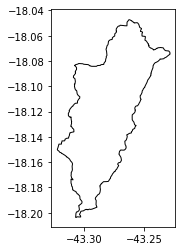

In [5]:
bacia = geopandas.read_file(PATH+'zapRibSantana.gpkg', layer='bacia')
bacia.crs = 'epsg:4326'
bacia.plot(color='white', edgecolor='black')

In [6]:
df = pd.read_csv(PATH+CSV, encoding='latin-1')
df.rename(columns={'Portaria':'portaria',
    'Data de Publicação': 'publicacao',
    'Data de Vencimento da Portaria': 'vencimento',
    'Status Processo': 'status',
    'Empreendedor': 'pf',
    'CPF_CNPJ Empreendedor': 'cpfCnpjPf',
    'Endereço Empreendedor': 'enderecoPf',
    'Número Empreendedor': 'numPf',
    'Complemento Empreendedor': 'complementoPf',
    'Bairro Empreendedor': 'bairroPf',
    'Município Empreendedor': 'municipioPf',
    'UF Empreendedor': 'estadoPf',
    'CEP Empreendedor': 'cepPf',
    'Telefone Empreendedor': 'telefonePf',
    'Caixa Postal Empreendedor': 'caixaPostalPf',
    'Empreendimento': 'Pj',
    'CPF_CNPJ Empreendimento': 'cpfCnpjPj',
    'Endereço Empreendimento': 'enderecoPj',
    'Número Empreendimento': 'numPj',
    'Complemento Empreendimento': 'complementoPj',
    'Bairro Empreendimento': 'bairroPj',
    'Município Empreendimento': 'municipioPj',
    'UF Empreendimento': 'estadoPj',
    'CEP Empreendimento': 'cepPj',
    'Telefone Empreendimento': 'telefonePj',
    'Caixa Postal Empreendimento': 'caixaPostalPj',
    'Bacia Federal GEO': 'baciaFederal',
    'Bacia Estadual': 'baciaEstadual',
    'UPGRH': 'upgrh',
    'Curso D´água': 'cursoDagua',
    'Tipo': 'tipo',
    'Codigo_Modo_Uso': 'codigoUso',
    'Modo de Uso': 'modoUso',
    'Área inundada': 'areaInundada',
    'Volume de acumulação': 'volAcumulacao',
    'Finalidades': 'finalidades',
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    'Latitude Grau': 'latGrau',
    'Latitude Minutos': 'latMin',
    'Latitude Segundos': 'latSeg',
    'Longitude Graus': 'longGrau',
    'Longitude Minutos': 'longMin',
    'Longitude Segundos': 'longSeg',
    'UTM X': 'utmX',
    'UTM Y': 'utmY',
    'DATUM': 'datum',
    'Fuso': "fuso",
    'Meridiano Central': 'meridiano',
    'Unidade_Vazao': 'unidadeVazao',
    'Vazao Jan': 'vazaoJan',
    'Vazao Fev': 'vazaoFev',
    'Vazao Mar': 'vazaoMar',
    'Vazao Abr': 'vazaoAbr',
    'Vazao Mai': 'vazaoMai',
    'Vazao Jun': 'vazaoJun',
    'Vazao Jul': 'vazaoJul',
    'Vazao Ago': 'vazaoAgo',
    'Vazao Set': 'vazaoSet',
    'Vazao Out': 'vazaoOut',
    'Vazao Nov': 'vazaoNov',
    'Vazao Dez': 'vazaoDez',
    'Captacao Jan': 'capJan',
    'Captacao Fev': 'capFev',
    'Captacao Mar': 'capMar',
    'Captacao Abr': 'capAbr',
    'Captacao Mai': 'caoMai',
    'Captacao Jun': 'capJun',
    'Captacao Jul': 'capJul',
    'Captacao Ago': 'capAgo',
    'Captacao Set': 'capSet',
    'Captacao Out': 'capOut',
    'Captacao Nov': 'capNov',
    'Captacao Dez': 'capDez',
    'Dia/Mes Jan': 'diaMesJan',
    'Dia/Mes Fev': 'diaMesFev',
    'Dia/Mes Mar': 'diaMesMar',
    'Dia/Mes Abr': 'diaMesAbr',
    'Dia/Mes Mai': 'diaMesMai',
    'Dia/Mes Jun': 'diaMesJun',
    'Dia/Mes Jul': 'diaMesJul',
    'Dia/Mes Ago': 'diaMesAgo',
    'Dia/Mes Set': 'diaMesSet',
    'Dia/Mes Out': 'diaMesOut',
    'Dia/Mes Nov': 'diaMesNov',
    'Dia/Mes Dez': 'diaMesDez',
    'DES_ATIVIDADE': 'desAtividade',
    'COD_COPAM': 'codCopam',
    'TIPO_LICENCA': 'tipoLicenca',
    'DNPM': 'dnpm',
    'PORTE': 'porte',
    'CLASSE': 'classe',
    'Uso Insignificante': 'usoInsignificante',
    'Data Maxima da Decisao': 'dataMaxDecisao',
    'Formalizacao': 'formalizacao',
    'Concessao': 'concessao',
    'OBSERVACAO': 'observacao',
    'Num_FCE': 'numFce',
    'Ano_FCE': 'anoFce',
    'Num_FOB': 'numFob',
    'Ano_FOB': 'anoFob',
    'OBS_VALOR_COBRANCA': 'valorCobranca',
    'VALOR_LICENCIAMENTO': 'valorLicenciamento',
    'VALOR_ANALISE': 'valorAnalise',
    'VALOR_IGAM': 'valorIgam',
    'VALOR_LICENCIAMENTO_IEF': 'valorLicenIef',
    'Unidade de Análise': 'unidadeAnalise',
    'Natureza_Outorga': 'naturezaOutorga',
    'Portaria_Renovada_Retificada': 'portRenovRetif'
}, inplace = True)
#df.columns

df['publicacao'] = pd.to_datetime(df['publicacao'], format='%d/%m/%Y')
df['vencimento'] = pd.to_datetime(df['vencimento'], format='%d/%m/%Y')
#df[['publicacao', 'vencimento', 'latitude', 'longitude']].head()

df['latGrau'] = df['latGrau'].str.replace('º', '')
df['longGrau'] = df['longGrau'].str.replace('º', '')
#df[['latGrau', 'longGrau']].head()

df['latMin'] = df['latMin'].str.replace('´', '')
df['longMin'] = df['longMin'].str.replace('´', '')
#df[['latMin', 'longMin']].head()

df['latSeg'] = df['latSeg'].str.replace('"', '')
df['longSeg'] = df['longSeg'].str.replace('"', '')
#df[['latSeg', 'longSeg']].head()

#df.loc['48302/2019']['latSeg']
df['latSeg'] = df['latSeg'].str.replace(',', '.')
df['longSeg'] = df['longSeg'].str.replace(',', '.')
df['latSeg'] = df['latSeg'].str.replace(' ', '')
df['longSeg'] = df['longSeg'].str.replace(' ', '')
df['latitude'] = df['latitude'].str.replace(',', '.')
df['longitude'] = df['longitude'].str.replace(',', '.')

df[["latGrau", "latMin", "latSeg", "longGrau", "longMin", "longSeg"]] = df[["latGrau", "latMin", "latSeg", "longGrau", "longMin", "longSeg"]].apply(pd.to_numeric)
#df[['latitude', 'latGrau', 'latMin', 'latSeg', 'longitude', 'longGrau', 'longMin', 'longSeg', ]].head()

df[["utmX", "utmY"]] = df[["utmX", "utmY"]].apply(pd.to_numeric)
#(df[["utmX", "utmY"]].dropna()
#    .head())

df['longDec'] = -1 * (df['longGrau'] + df['longMin']/60 + df['longSeg']/3600)
df['latDec'] = -1 * (df['latGrau'] + df['latMin']/60 + df['latSeg']/3600)
#df[['latDec', 'longDec']].head()
#print(outorga.shape)
outorga = (df[df['tipo'].str.contains("Superficial")]
     .drop_duplicates())
#print(outorga.shape)
outorga = outorga[~outorga['modoUso'].str.contains('TRAVESSIA')]
#print(outorga.shape)
outorga = outorga[outorga['vencimento'] > '2019-07-01']
#print(outorga.shape)
outorga = outorga[(outorga['status'] == 'OUTORGA RENOVADA') | (outorga['status'] == 'OUTORGA DEFERIDA') | (outorga['status'] == 'CADASTRO EFETIVADO')]

#print(df.shape, outorga.shape)
#outorga.head()

sad69utm = outorga[(outorga['datum'] == 'SAD 69')].dropna(subset=['utmX'])
#print(sad69utm.shape)
wgs84utm = outorga[outorga['datum'] == 'WGS84'].dropna(subset=['utmX'])
#print(wgs84utm.shape)
sad69scg = outorga[(outorga['datum'] == 'SAD 69')].dropna(subset=['latDec'])
#print(sad69scg.shape)
#print(sad69scg.head())
wgs84scg = outorga[(outorga['datum'] == 'WGS84')].dropna(subset=['latDec'])
#print(wgs84scg.shape)
#print(wgs84scg.head())

sad69scg.to_csv(PATH+'sad69scg.csv', index=False, sep = ',')
wgs84scg.to_csv(PATH+'wgs84scg.csv', index=False, sep = ',')
sad69utm.to_csv(PATH+'sad69utm.csv', index=False, sep = ',')
wgs84utm.to_csv(PATH+'wgs84utm.csv', index=False, sep = ',')

In [7]:
sad69scg = pd.read_csv(PATH+'sad69scg.csv')
sad69scgLayer = geopandas.GeoDataFrame(sad69scg, geometry=geopandas.points_from_xy(sad69scg.longDec, sad69scg.latDec))
#sad69scgLayer.crs = {'init': 'epsg:4291'}
sad69scgLayer.crs = 'epsg:4291'
#sad69scgLayer = sad69scgLayer.to_crs({'init': 'epsg:4326'})
sad69scgLayer = sad69scgLayer.to_crs('epsg:4326')

wgs84scg = pd.read_csv(PATH+'wgs84scg.csv')
wgs84scgLayer = geopandas.GeoDataFrame(wgs84scg, geometry=geopandas.points_from_xy(wgs84scg.longDec, wgs84scg.latDec))
#wgs84scgLayer.crs = {'init': 'epsg:4326'}
wgs84scgLayer.crs = 'epsg:4326'

sad69utm = pd.read_csv(PATH+'sad69utm.csv')
sad69utmLayer = geopandas.GeoDataFrame(sad69utm, geometry=geopandas.points_from_xy(sad69utm.utmX, sad69utm.utmY))
#sad69utmLayer.crs = {'init': 'epsg:29183'}
sad69utmLayer.crs = 'epsg:29183'
#sad69utmLayer = sad69utmLayer.to_crs({'init': 'epsg:4326'})
sad69utmLayer = sad69utmLayer.to_crs('epsg:4326')

wgs84utm = pd.read_csv(PATH+'wgs84utm.csv')
wgs84utmLayer = geopandas.GeoDataFrame(wgs84utm, geometry=geopandas.points_from_xy(wgs84utm.utmX, wgs84utm.utmY))
#wgs84utmLayer.crs = {'init': 'epsg:32723'}
wgs84utmLayer.crs = 'epsg:32723'
#wgs84utmLayer = wgs84utmLayer.to_crs({'init': 'epsg:4326'})
wgs84utmLayer = wgs84utmLayer.to_crs('epsg:4326')

In [8]:
outorgaslayer = pd.concat([sad69scgLayer, wgs84scgLayer, sad69utmLayer, wgs84utmLayer])
outorgaslayer.crs = 'epsg:4326'
outorgaslayer.to_file(PATH+'zapRibSantana.gpkg', layer='outorgas', driver="GPKG")

In [10]:
# outorgasBacia = geopandas.sjoin(outorgaslayer, bacia, how="inner", op='intersects')
outorgasBacia = geopandas.sjoin(outorgaslayer, bacia, how="inner", op='within')

In [11]:
outorgasBacia['captacao'] = 0.5/1000
outorgasBacia.to_file(PATH+'zapRibSantana.gpkg', layer='outorgasBacia', driver="GPKG")

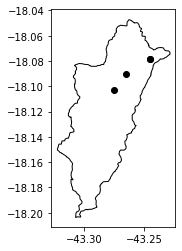

In [12]:
base1 = bacia.plot(color='white', edgecolor='black')
outorgasBacia.plot(ax=base1, marker='o', color = 'black')
# plt.savefig('/home/gorgens/Github/i_zap/03_dispHidrica/outorgasBacia.png')

## Parte 2 - Disponibilidade hídrica

In [13]:
outorgasBacia = geopandas.read_file(PATH+"zapRibSantanaUpdate.gpkg", layer='outorgasBacia')
hidricoInteresse = geopandas.read_file(PATH+"zapRibSantanaUpdate.gpkg", layer='redeHidro')
ottoInteresse = geopandas.read_file(PATH+"zapRibSantanaUpdate.gpkg", layer='ottobacias')
limitCaptacao = 0.5

In [14]:
outorgasBacia = outorgasBacia.drop(['index_right'], axis=1)
joinedOutorgas = geopandas.sjoin(outorgasBacia, ottoInteresse, op="within")
#print(joinedOutorgas.head())
#print(joinedOutorgas[['Processo Outorga', 'cobacia', 'captacao']].head())

grouped = joinedOutorgas.groupby('cobacia').sum()
grouped.reset_index(inplace=True)

grouped = grouped[['cobacia', 'captacao']]
#print(grouped.head())

hidricoInteresse = hidricoInteresse.merge(grouped, on='cobacia', how='outer')
hidricoInteresse.rename(columns={'captacao': 'QdemTotal'}, inplace=True)

In [15]:
hidricoInteresse['QDH'] = limitCaptacao * hidricoInteresse['q7_10'] - hidricoInteresse['QdemTotal']
hidricoInteresse['compromDH'] = ((limitCaptacao * hidricoInteresse['q7_10']) - hidricoInteresse['QDH']) * 100 / (limitCaptacao * hidricoInteresse['q7_10'])
hidricoInteresse['Qreg'] = (0.7 * hidricoInteresse['qmld_']) - (limitCaptacao * hidricoInteresse['q7_10'])
hidricoInteresse['Viab'] = hidricoInteresse['Qreg'] + hidricoInteresse['QDH']

hidricoInteresse['QdemTotal'] = hidricoInteresse['QdemTotal'].fillna(0)
hidricoInteresse['QDH'] = hidricoInteresse['QDH'].fillna(0)
hidricoInteresse['Qreg'] = hidricoInteresse['Qreg'].fillna(0)
hidricoInteresse['compromDH'] = hidricoInteresse['compromDH'].fillna(0)
hidricoInteresse['Viab'] = hidricoInteresse['Viab'].fillna(0)

hidricoInteresse.to_file(PATH+"zapRibSantanaUpdate.gpkg", layer='disponibilidade', driver="GPKG")

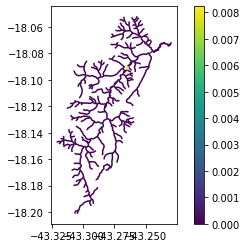

In [16]:
hidricoInteresse.plot(column='QdemTotal', legend=True)